### Introduction to Digital Image Processing with Python
The most fundamental libraries we will be using throughout the entire course are:
* **OpenCV**
 * For loading, saving and manipulating images and videos.
* **numpy**
 * Powerful tool for working with (multidimensional) matrices (which are mathematical representations of digital images and videos).
* **matplotlib**
 * Library for easy plotting (figures, plots, images, etc.).

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

Let's start by loading and plotting an image.

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

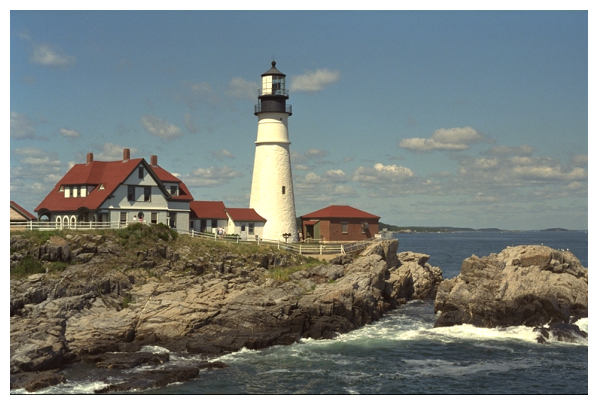

In [5]:
img = cv2.imread("kodim21.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

**Important**: For historical reasons, OpenCV loads images in **BGR** colour space (not RGB!). We need to manually change the order of colour channels.

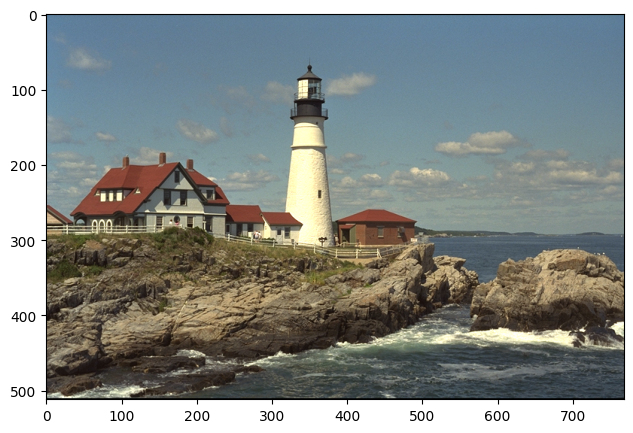

In [7]:
rows, cols, channels = img.shape
img_rgb = np.zeros_like(img)

for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        img_rgb[r, c, 0] = pixel[2]
        img_rgb[r, c, 1] = pixel[1]
        img_rgb[r, c, 2] = pixel[0]
        
plt.imshow(img_rgb)      

Fortunately, OpenCV provides us with a large variety of conversion functions.

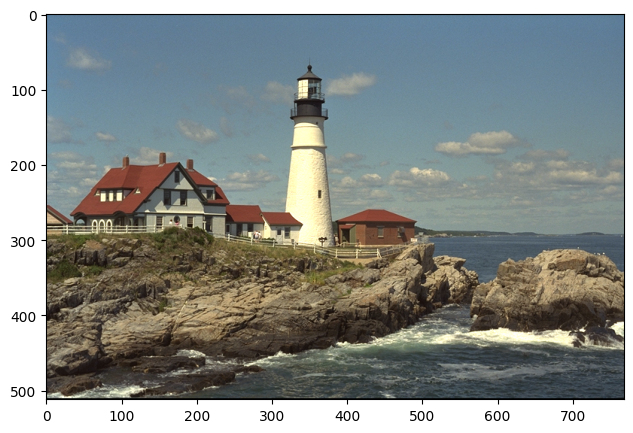

In [8]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

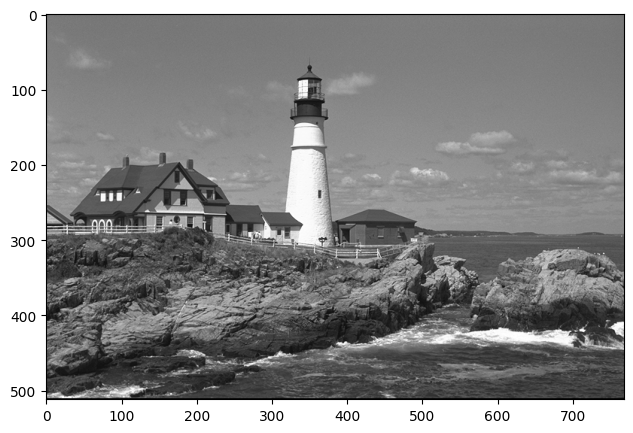

In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

In [10]:
img_gray.shape

(512, 768)

In [13]:
rows//2

256

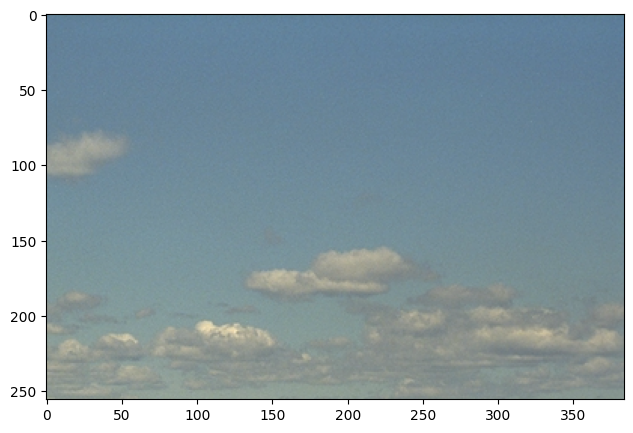

In [14]:
plt.imshow(img_rgb[0:rows//2, cols//2:, :])

### Image Loading Alternatives

Apart from OpenCV there are other packages that allow you to read images, e.g., [scikit-image](https://scikit-image.org/docs/0.23.x/api/skimage.io.html#skimage.io.imread), [torchvision](https://pytorch.org/vision/0.19/generated/torchvision.io.read_image.html) or [Pillow](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open), among many others.

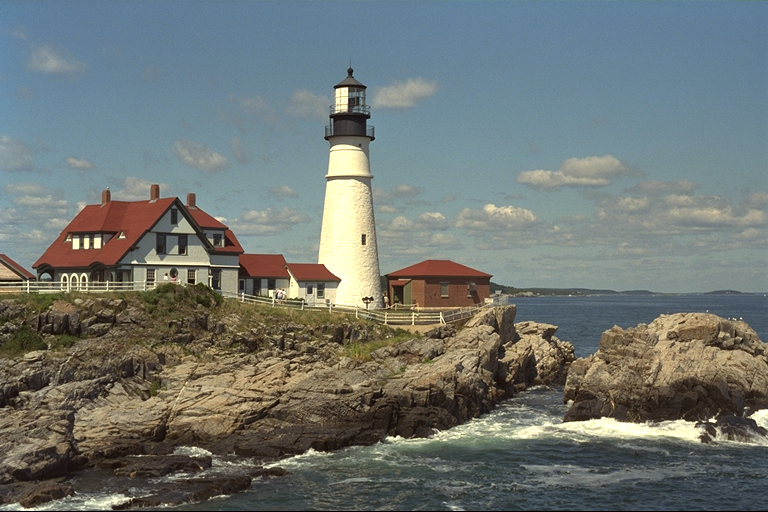

In [15]:
from PIL import Image
img = Image.open("kodim21.png")
img

Note that Pillow does not load images as numpy arrays. If we want to further process the image as arrays, we need to parse them. Fortunately, this is pretty easy :-)

```python
img = np.array(img)
```

### RGB vs CieLAB
RGB is not a perceptive colour space. The mathematical difference between two colours does not necessarilly relate to the perceptual difference. Let's see an example.

(<Axes: title={'center': 'Color 3'}>,
 Text(0.5, 1.0, 'Color 3'))

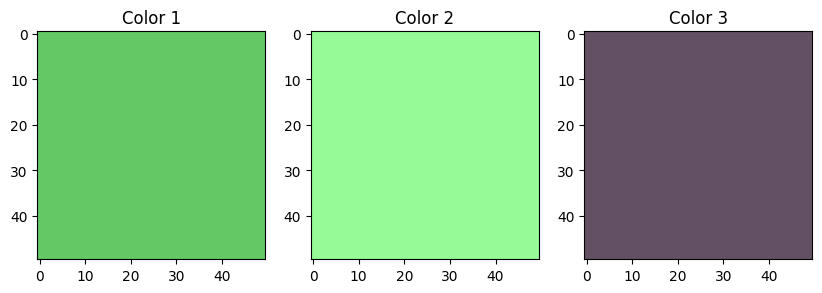

In [16]:
color_1 = np.zeros((50, 50, 3), dtype=np.uint8)
color_1[..., 0] = 100
color_1[..., 1] = 200
color_1[..., 2] = 100

# |color_1 - color_2| = 150
color_2 = np.zeros((50, 50, 3), dtype=np.uint8)
color_2[..., 0] = 150
color_2[..., 1] = 250
color_2[..., 2] = 150

# |color_1 - color_3| = 120
color_3 = np.zeros((50, 50, 3), dtype=np.uint8)
color_3[..., 0] = 100
color_3[..., 1] = 80
color_3[..., 2] = 100

plt.subplot(131), plt.imshow(color_1), plt.title('Color 1')
plt.subplot(132), plt.imshow(color_2), plt.title('Color 2')
plt.subplot(133), plt.imshow(color_3), plt.title('Color 3')

In [17]:
color_1_lab = cv2.cvtColor(color_1, cv2.COLOR_RGB2LAB)
color_2_lab = cv2.cvtColor(color_2, cv2.COLOR_RGB2LAB)
color_3_lab = cv2.cvtColor(color_3, cv2.COLOR_RGB2LAB)

print('Color 1 (LAB)', color_1_lab[0, 0, :])
print('Color 2 (LAB)', color_2_lab[0, 0, :])
print('Color 3 (LAB)', color_3_lab[0, 0, :])
print(' ')

print('SAD with respect to color 1')
print('Color 2', np.sum(np.abs(color_1_lab[0, 0, :].astype(np.float32) - color_2_lab[0, 0, :].astype(np.float32))))
print('Color 3', np.sum(np.abs(color_1_lab[0, 0, :].astype(np.float32) - color_3_lab[0, 0, :].astype(np.float32))))

Color 1 (LAB) [186  79 169]
Color 2 (LAB) [231  79 167]
Color 3 (LAB) [ 94 140 119]
 
SAD with respect to color 1
Color 2 47.0
Color 3 203.0
